In [15]:
import os
from utils import load_caption, decode_caption, load_vocab
from tqdm import tqdm
import pickle
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [16]:
vocab = load_vocab('/home/spb61/coco2014_vocab.json')

word_to_idx
idx_to_word
Loaded dictionary...
Dictionary size: 5004


In [4]:
cap = load_caption(1, image_dir="/datadrive/val_beam_2_states/")
print(cap['total_prob'])

0.0030246086544908823


In [96]:
# def total_probs(beam_size=2):
#     image_dir = "/datadrive/val_beam_{}_states/".format(beam_size)
#     total_probs = []
#     for image in tqdm(os.listdir(image_dir)):
#         cap = load_caption(image, image_dir=image_dir)
#         total_probs.append(cap['total_prob'])
#         if not image.endswith("json"):
#             print(image)
#     print("Images found: {}".format(len(total_probs)))
#     return total_probs

# probs = {}
# for k in [1,2,10,100]:
#     probs[k] = total_probs(beam_size=k)
    
# pickle.dump(probs, open( "probs.pickle", "wb" ) )

probs = pickle.load(open( "probs.pickle", "rb" ))

Beam size 1: probability covered: 0.0020	0.0062
Beam size 2: probability covered: 0.0038	0.0079
Beam size 10: probability covered: 0.0121	0.0158
Beam size 100: probability covered: 0.0344	0.0328


<Container object of 4 artists>

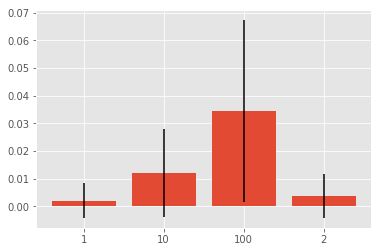

In [97]:
mean_sizes = []
sizes_std = []
for k in sorted(probs.keys()):
    mean_sizes.append(np.mean(probs[k]))
    sizes_std.append(np.std(probs[k]))
    print("Beam size {}: probability covered: {:.4f}\t{:.4f}".format(k, np.mean(probs[k]), np.std(probs[k])))
    
X = [str(x) for x in sorted(probs.keys())]
plt.bar(X, mean_sizes, yerr=sizes_std)

1
2
10
100


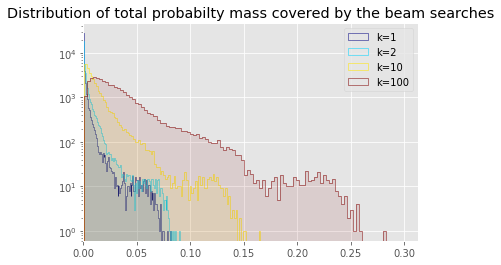

In [98]:
base = plt.cm.get_cmap(plt.cm.jet)
color_list = base(np.linspace(0, 1, len(probs.keys())))
max_prob = np.max([np.max(ps) for ps in probs.values()]) + 0.03
for k, color in zip(sorted(probs.keys()), color_list):
    plt.hist(probs[k], bins=100, label="k={}".format(k), color=color, histtype='step');
    plt.hist(probs[k], bins=100, alpha=0.1, color=color);
    
    plt.yscale('log')
    plt.xlim([0, max_prob])
    print(k)
plt.title("Distribution of total probabilty mass covered by the beam searches")
plt.legend()
plt.savefig('../outputs/figs/total_probs_distribution.png', bbox_inches='tight')

In [119]:
# color_list = base(np.linspace(0, 1, len(probs.keys())))
# max_prob = np.max([np.max(ps) for ps in probs.values()]) + 0.03
# for k, color in zip(sorted(probs.keys()), color_list):
#     plt.hist(probs[k], bins=100, label="k={}".format(k), color=color, histtype='step', cumulative=True);
#     plt.hist(probs[k], bins=100, alpha=0.1, color=color, cumulative=True);
    
# #     plt.yscale('log')
#     plt.xlim([0, max_prob])
#     print(k)
    
probs_100 = np.array(probs[100])
print(sum(probs_100 < 0.1)/ len(probs_100))
print(sum(probs_100 > 0.2) / len(probs_100))

# plt.hist(probs_100, bins=100, cumulative=True, histtype='step', color='red');
# plt.hist(probs_100, bins=100, alpha=0.1, cumulative=True, color='red');
# # plt.yscale('log')

0.947289156626506
0.005505629073671736
